In [1]:
#importing dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#importing dataset
data = pd.read_csv("documents/datasets/fashion-mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#viewing the image
a = data.iloc[3,1:].values

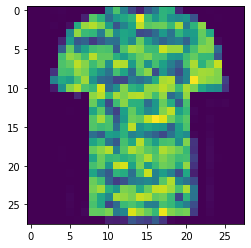

In [4]:
#reshaping the extracted data
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [5]:
#dividing the data into batches
data_clean = data.drop('label',axis = 1)
data_clean.head()
data_label = data['label']
data_label.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

In [6]:
#splitting the data into test and training sets
x_train, x_test, y_train, y_test = train_test_split(data_clean,data_label,test_size = 0.2,random_state = 4)

In [7]:
#checking split data
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20379,0,0,0,0,0,0,0,0,0,3,...,4,3,0,70,162,157,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,155,25,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,53,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,1,1,1,...,3,0,42,176,126,106,0,0,0,0


In [25]:
#call Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
#predicting test data
pred = rf.predict(x_test)
pred

array([4, 4, 2, ..., 1, 6, 7])

In [27]:
#checking prediction accuracy
s = y_test.values
count = 0
for i in range(len(pred)):
    if pred[i] == s[i]:
        count = count +1
print(count)
print(len(pred))
print(len(pred)-count)

10530
12000
1470


In [28]:
#finding accuracy percentage
acc_float = (count/len(pred))*100
acc_int = round(acc_float)
print( str(acc_int)+ "%")

88%
